In [51]:
import matplotlib.pyplot as plt
import numpy as np
import os
from src.simple_utils import load_pickle
from src.data_utils import cifar10_label_names, get_dataset
from os.path import join

In [52]:
alpha = 0.5
markersize = 12
# number of point figures to plot
num_figs = 10

In [53]:
# pred_dirs specifies location of "+".join(pred_dirs).pkl in processed
pred_dirs = ["early_stopping_logits", "pretrained_logits"]
# score_dirs specifies score group to consider (can be different from pred_dirs) 
score_dirs = ["early_stopping", "CLIP", "CLIP_high", "pretrained"]
# name of dataset to consider
# name = "CIFAR10v2_test"
name = "CINIC10_test"
# name of training dataset
train_set = "CIFAR10_train"
# points - fixed random index subset
# small - smallest non-monotonicity scores
# weird - largest non-monotonicity scores
ind_types = ["points", "small", "weird"]
ind_type = ind_types[2]

In [54]:
# pred_dirs.sort()
# score_dirs.sort()
# group_dir = "+".join(pred_dirs)
# score_dir = join("scores", "+".join(score_dirs))
# save_dir = join("figures", group_dir)

data_dir = "data"
proc_dir = "processed"

In [67]:
print("loading data")
grouped = load_pickle(join(proc_dir,  "early_stopping_logits.pkl"))
scores = load_pickle(join(proc_dir, "scores/scores.pkl"))
print("done")

print("loading dataset")
dataset = get_dataset(data_dir, name)
print("done")

classes = cifar10_label_names

# dataset sizes
default_sizes = {"CIFAR10_train": 50000, "CIFAR10_test": 10000}

# plot group plotting symbols
fmts = {
    "Resnet18": "bo",
    "Densenet121": "ro",
    "Resnet18-pretrained": "c^",
    "Densenet121-pretrained": "m^",
    "ClipViTB32": "go",
}

loading data
done
loading dataset
done


In [ ]:
# grouped['CIFAR10.1_test']['Densenet121']['labels'].shape

In [71]:
# fixed indices chosen by ind_style = "points"
# ind_fixed = [1022, 1252, 1977, 2573, 2977, 4974, 5564, 6935, 7170, 7251, 7901, 8002, 8042, 9598, 9773]

if ind_type == "weird":
    indexes = scores[name]["idx"][:num_figs].astype(int)
elif ind_type == "small":
    indexes = scores[name]["idx"][-num_figs:].astype(int)
elif ind_type == "points":
    indexes = ind_fixed[:num_figs]
else:
    raise ValueError("unavailable index type %s" % ind_type)

In [69]:
# if not os.path.isdir(save_dir):
#     os.mkdir(save_dir)
# if not os.path.isdir(join(save_dir, name)):
#     os.mkdir(join(save_dir, name))

print(scores[name]["vals"][:5000])

[0.9        0.88666667 0.86666667 ... 0.28666667 0.28666667 0.28666667]


index 72604


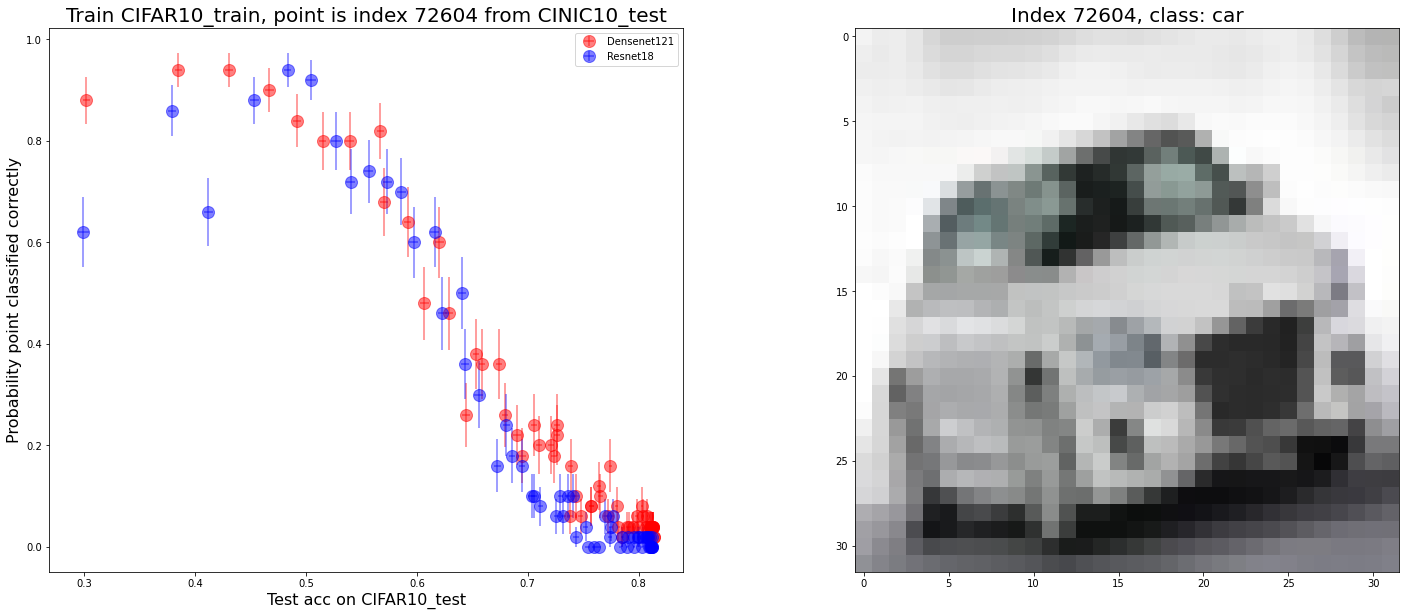

index 79915


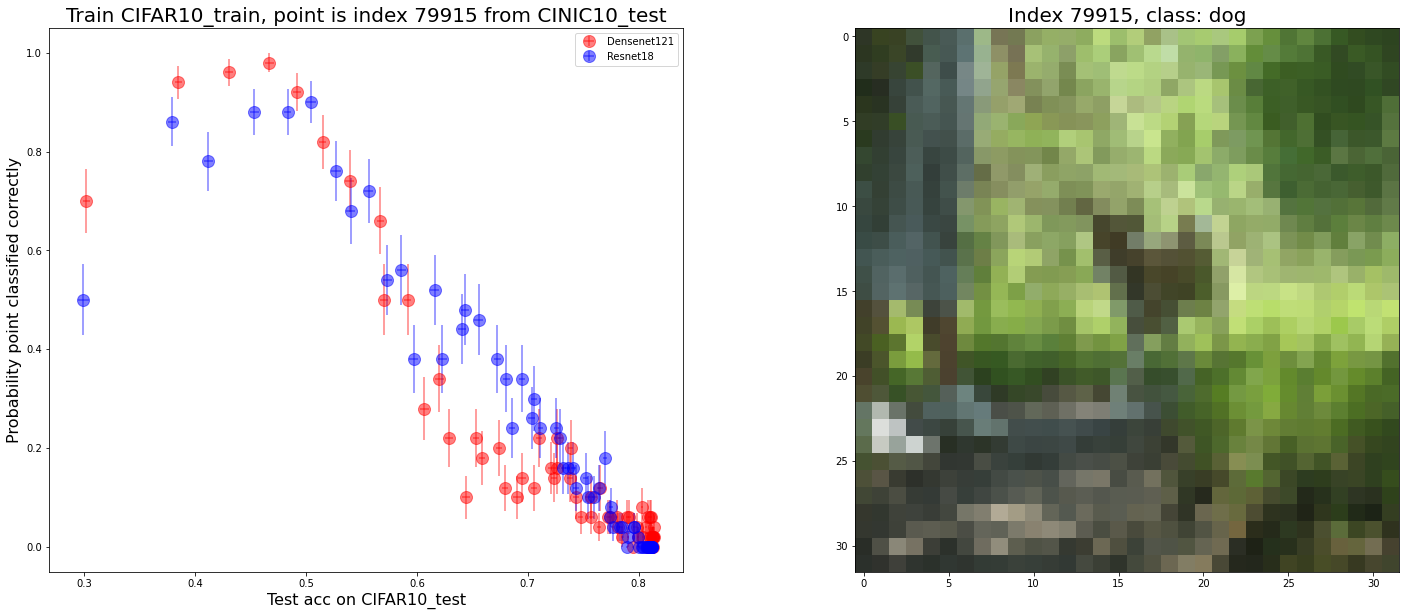

index 75846


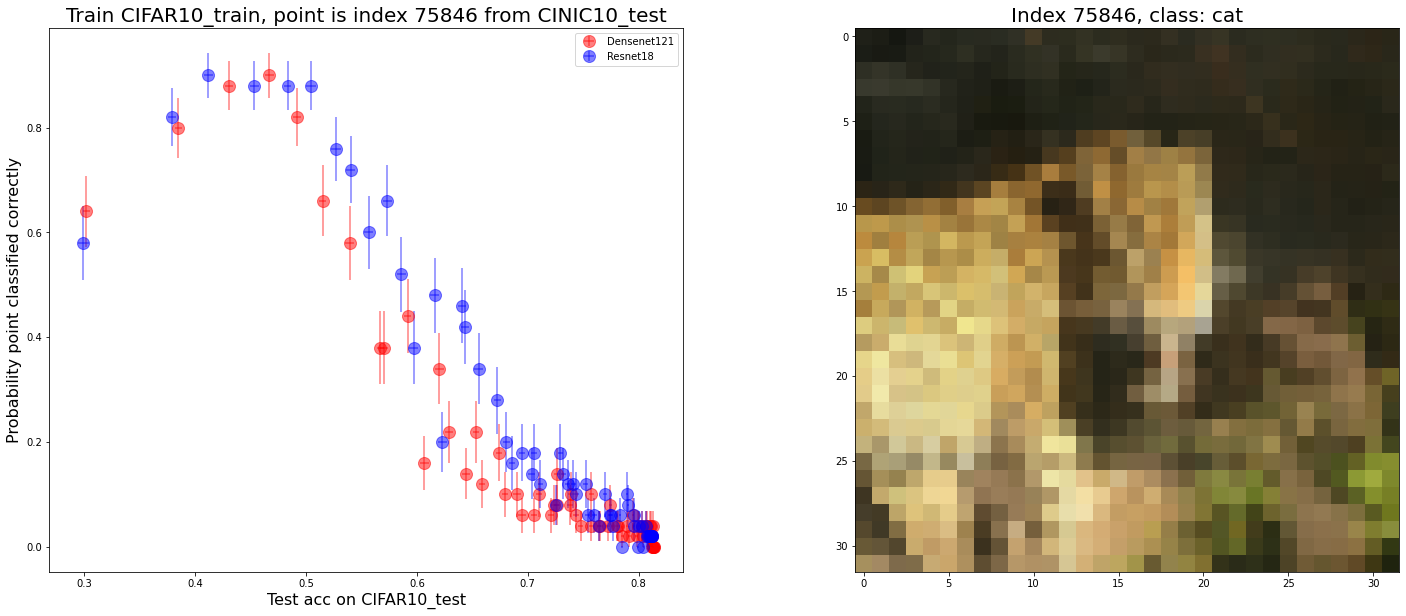

index 86418


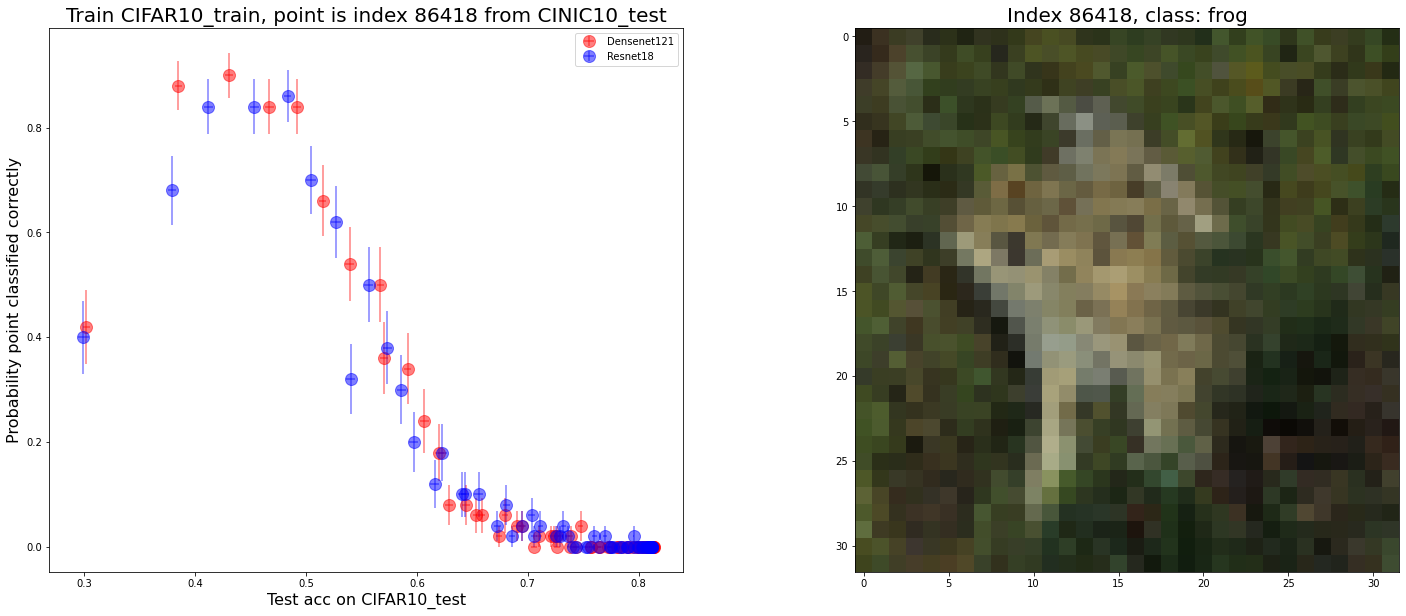

index 62388


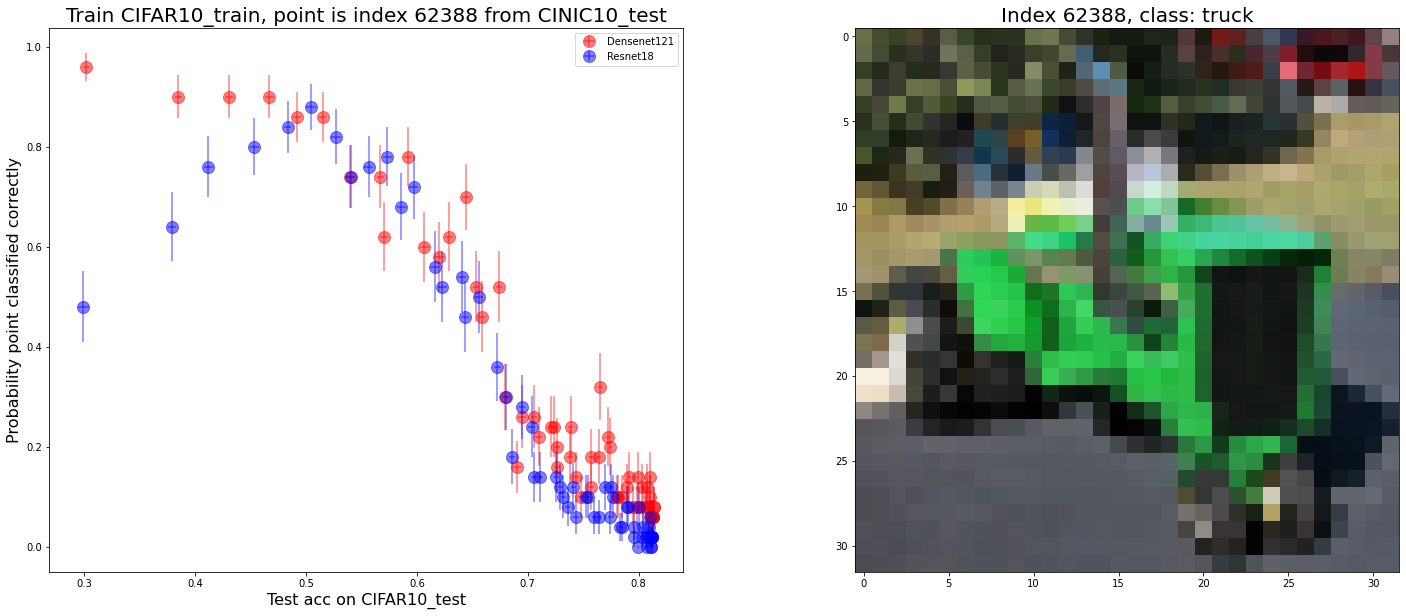

index 78922


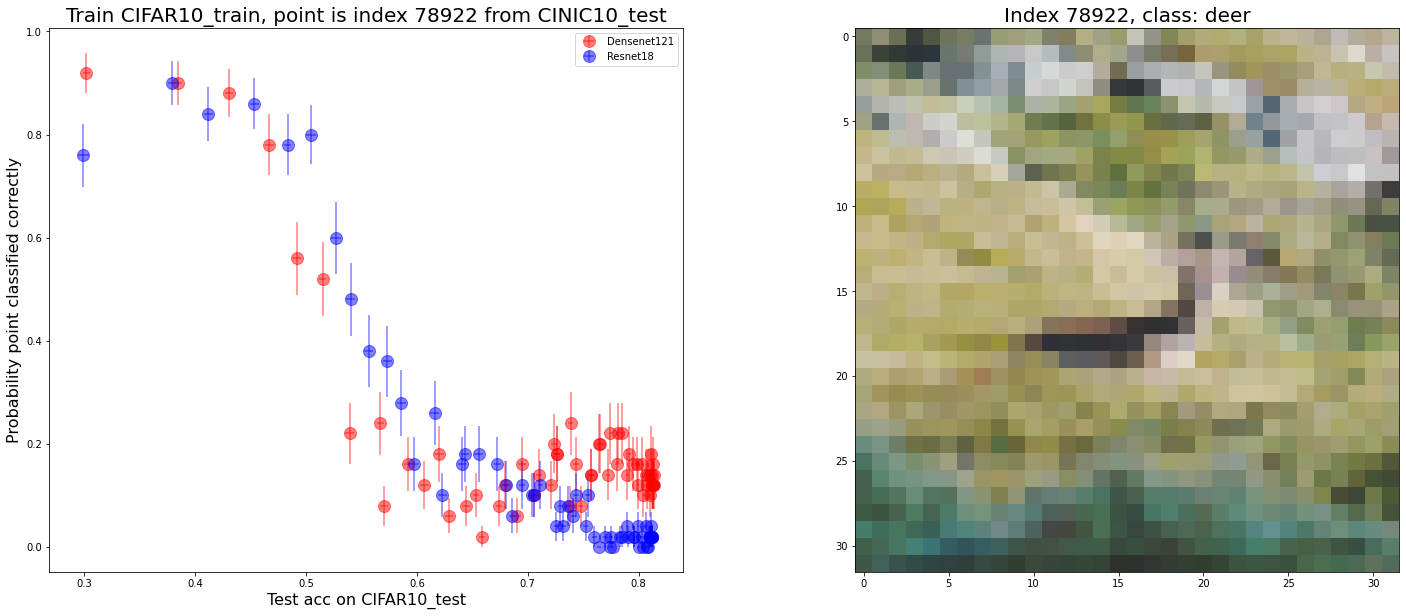

index 88112


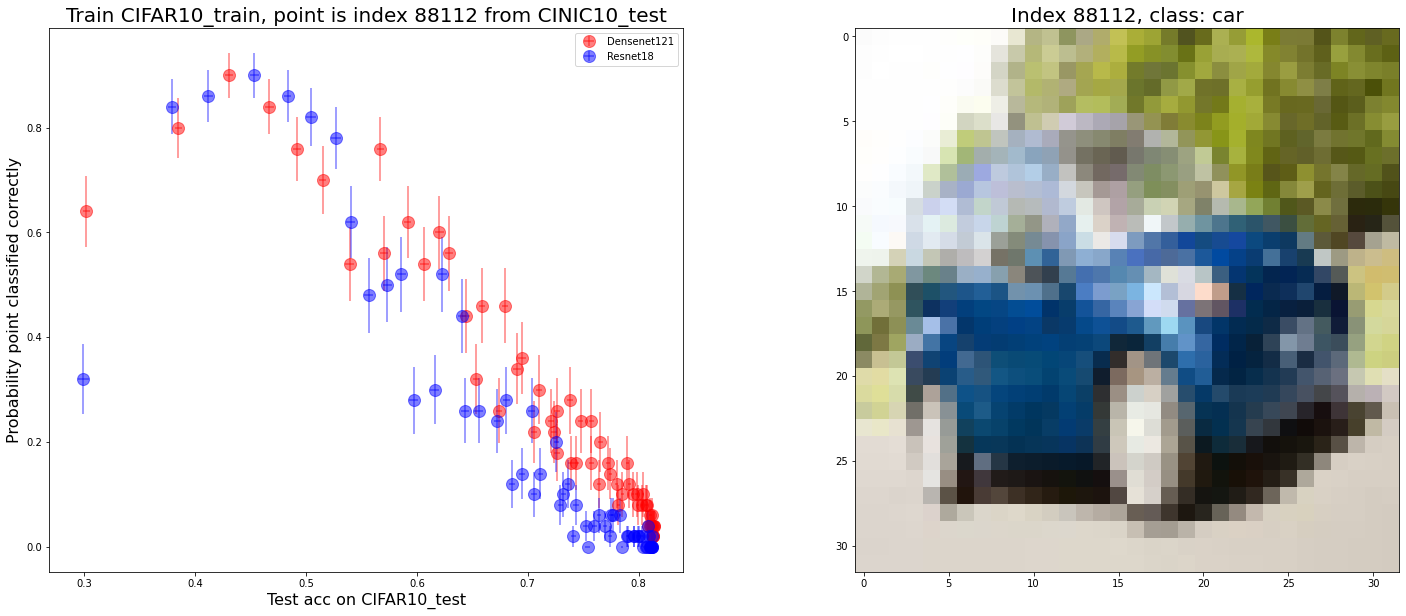

index 70374


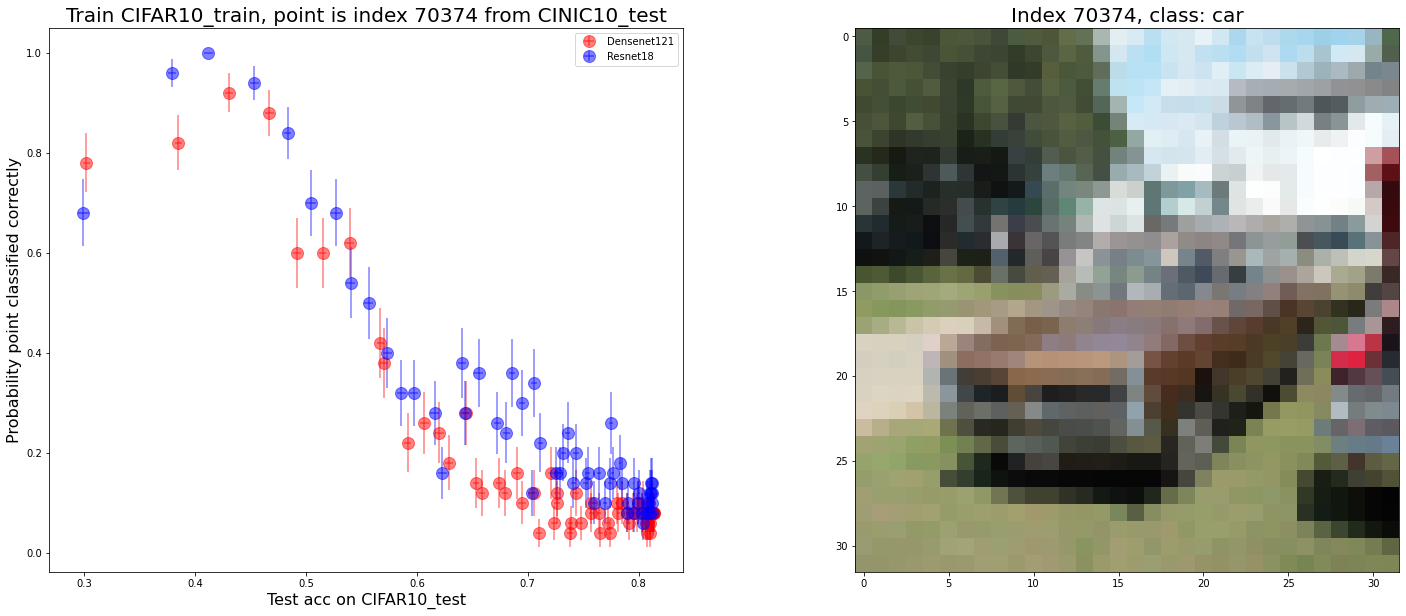

index 65941


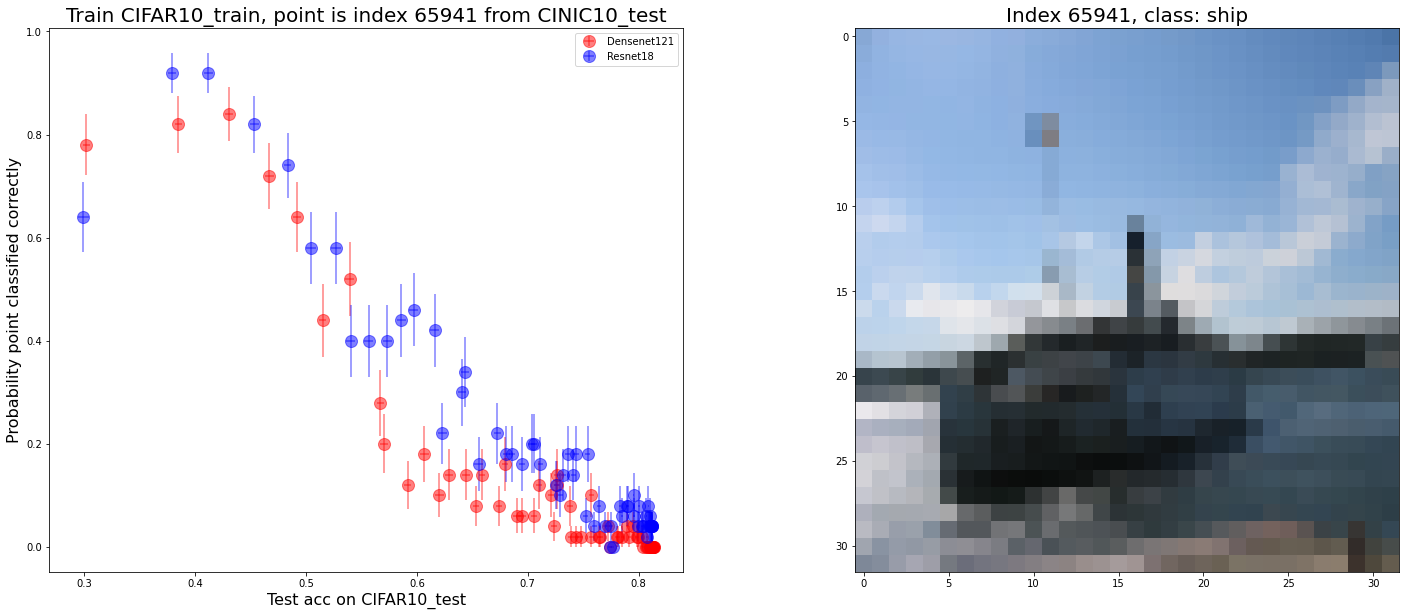

index 75803


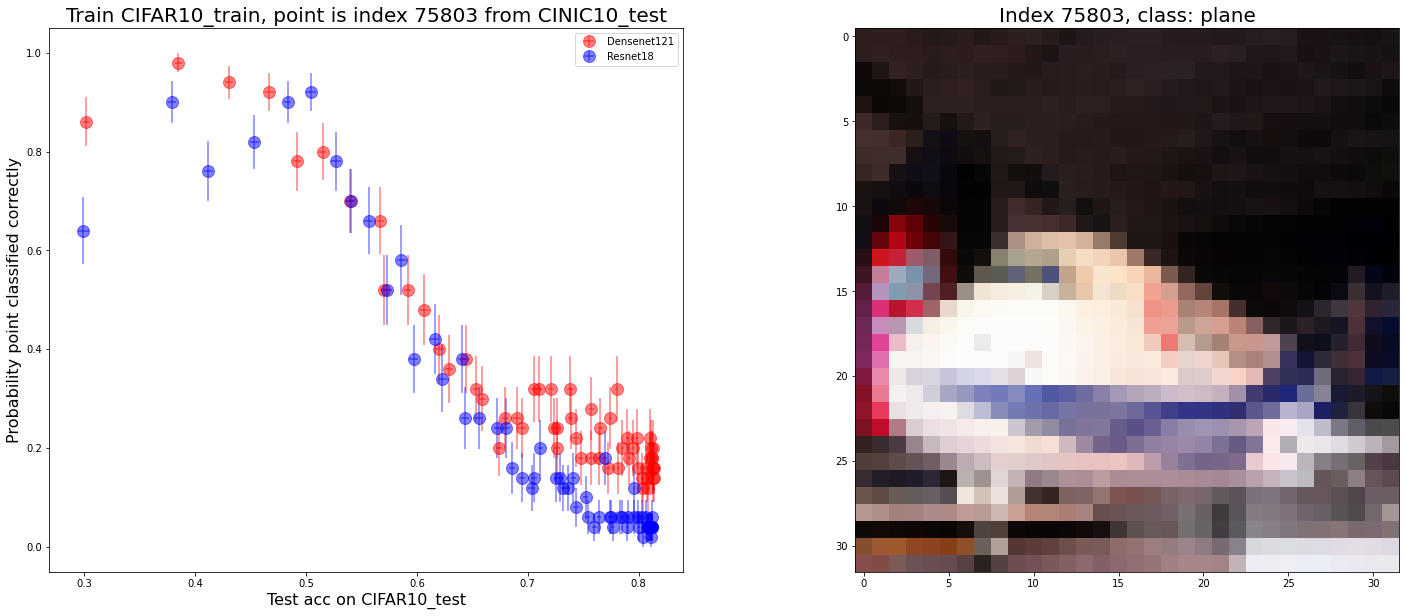

In [72]:
# point plots
for idx in indexes:
    print("index %d" % idx)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
    for plot_group in grouped[name]:
        dct = grouped[name][plot_group]
        ax1.errorbar(
            dct["x"],
            dct["points"][idx],
            yerr=dct["points_err"][idx],
            xerr=dct["x_err"],
            fmt=fmts[plot_group],
            alpha=alpha,
            markersize=markersize,
            label=plot_group,
        )

    ax1.set_xlabel("Test acc on %s" % "CIFAR10_test", fontsize=16)
    ax1.set_ylabel("Probability point classified correctly", fontsize=16)
    ax1.set_title(
        "Train %s, point is index %d from %s" % (train_set, idx, name),
        fontsize=20,
    )

    ax1.legend(loc="best")
    img, label = dataset.__getitem__(idx)
    img = np.array(img) #.transpose(1,2,0)/255.0
    ax2.imshow(img, interpolation="nearest")
    ax2.set_title("Index %d, class: %s" % (idx, classes[label]), fontsize=20)
    # plot_path = join(save_dir, name, ind_type)
    # if not os.path.isdir(plot_path):
    #     os.mkdir(plot_path)
    # plt.savefig(join(plot_path, "plot_acc_" + str(idx) + ".png"))
    plt.show()


label 0


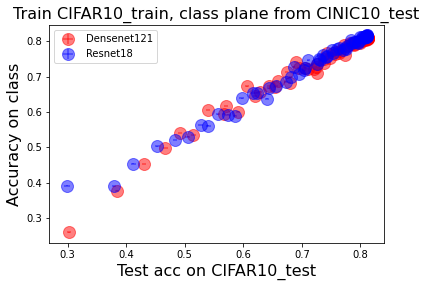

label 1


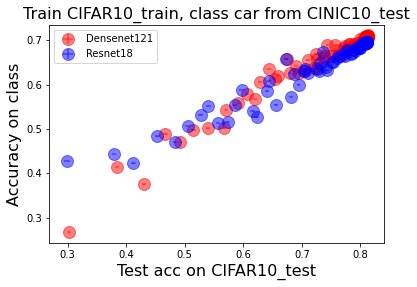

label 2


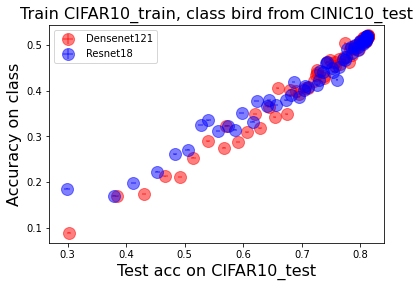

label 3


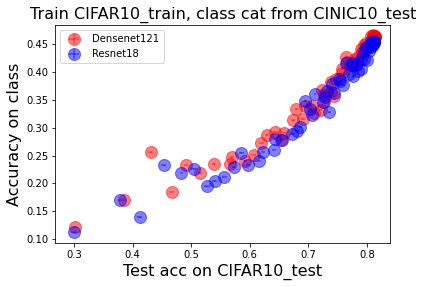

label 4


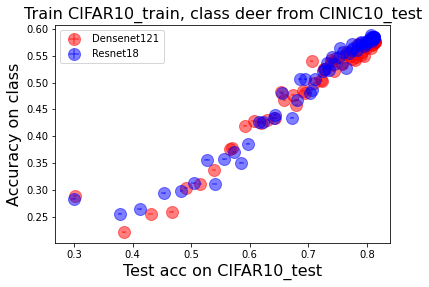

label 5


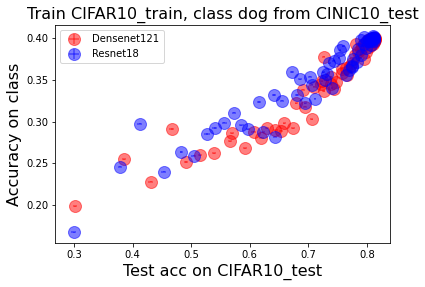

label 6


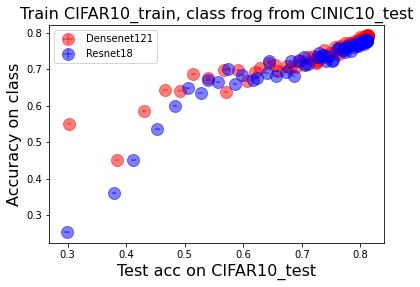

label 7


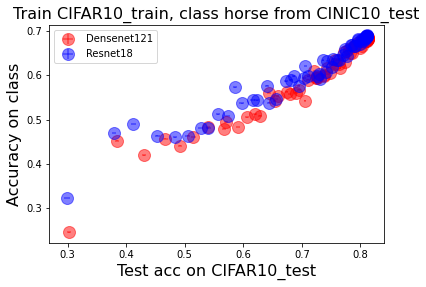

label 8


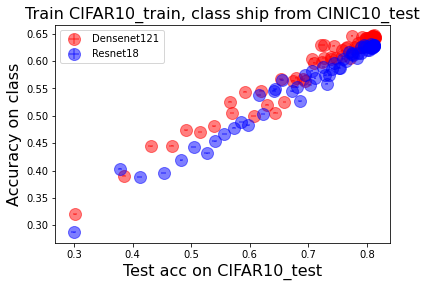

label 9


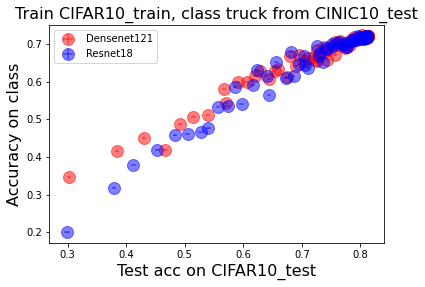

In [70]:
# class plots
# plotting only first few classes for simplicity
num_classes = len(classes)
num_classes = num_figs
for label in range(num_classes):
    print("label %d" % label)
    plt.figure()
    for plot_group in grouped[name]:
        dct = grouped[name][plot_group]
        plt.errorbar(
            dct["x"],
            dct["labels"][label],
            yerr=dct["labels_err"][label],
            xerr=dct["x_err"],
            fmt=fmts[plot_group],
            alpha=alpha,
            markersize=markersize,
            label=plot_group,
        )

    plt.xlabel("Test acc on %s" % "CIFAR10_test", fontsize=16)
    plt.ylabel("Accuracy on class", fontsize=16)
    plt.title(
        "Train %s, class %s from %s" % (train_set, classes[label], name),
        fontsize=16,
    )

    plt.legend(loc="best")
#     class_path = join(save_dir, name, "classes")
    # if not os.path.isdir(class_path):
    #     os.mkdir(class_path)
    # plt.savefig(join(class_path, "plot_acc_class" + str(label) + ".png"))
    plt.show()


index 3568
probs
freqs


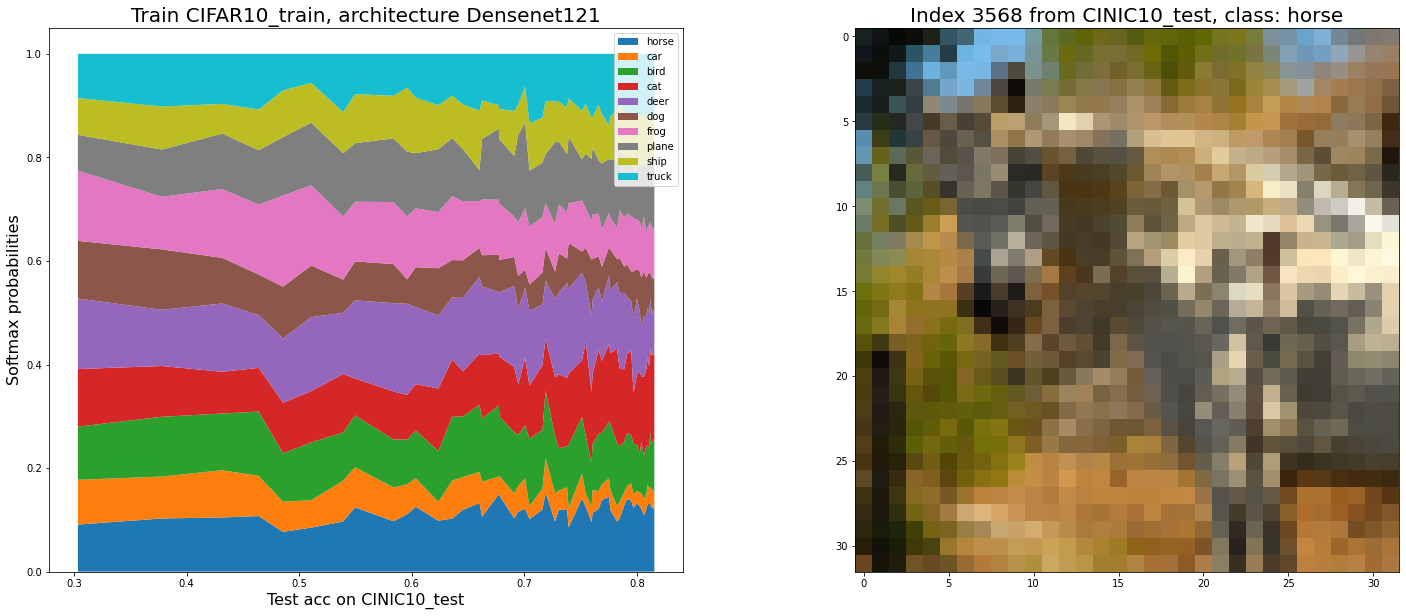

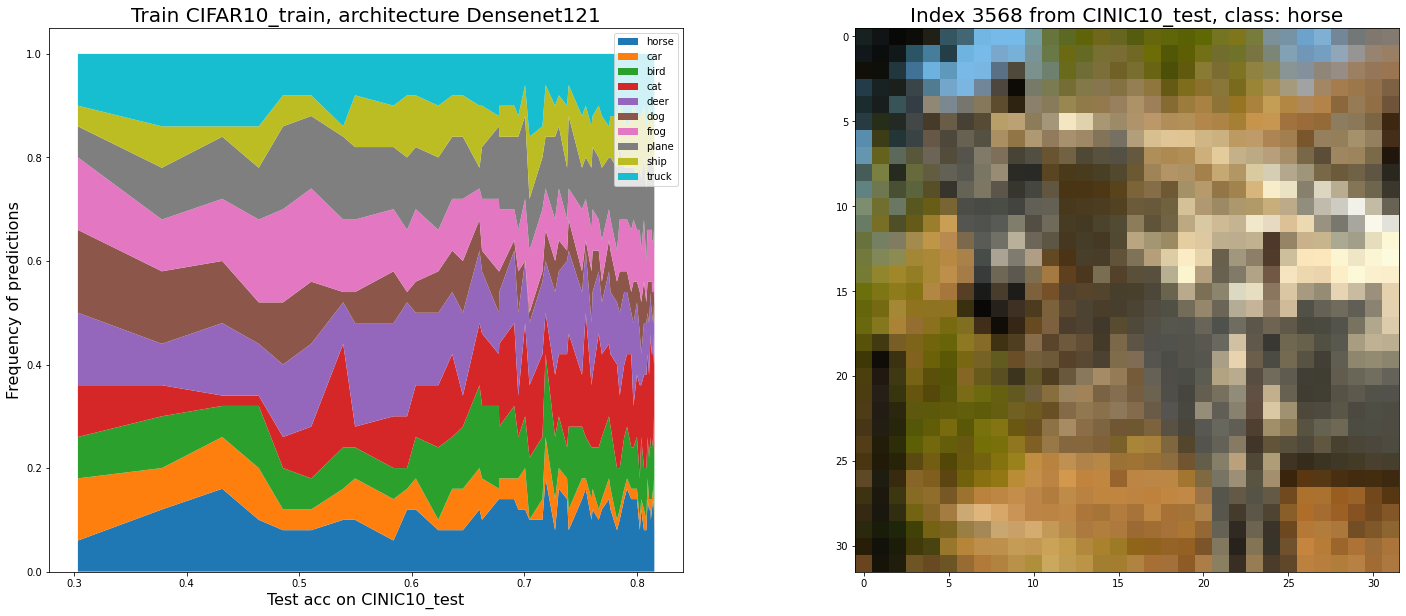

index 18206
probs
freqs


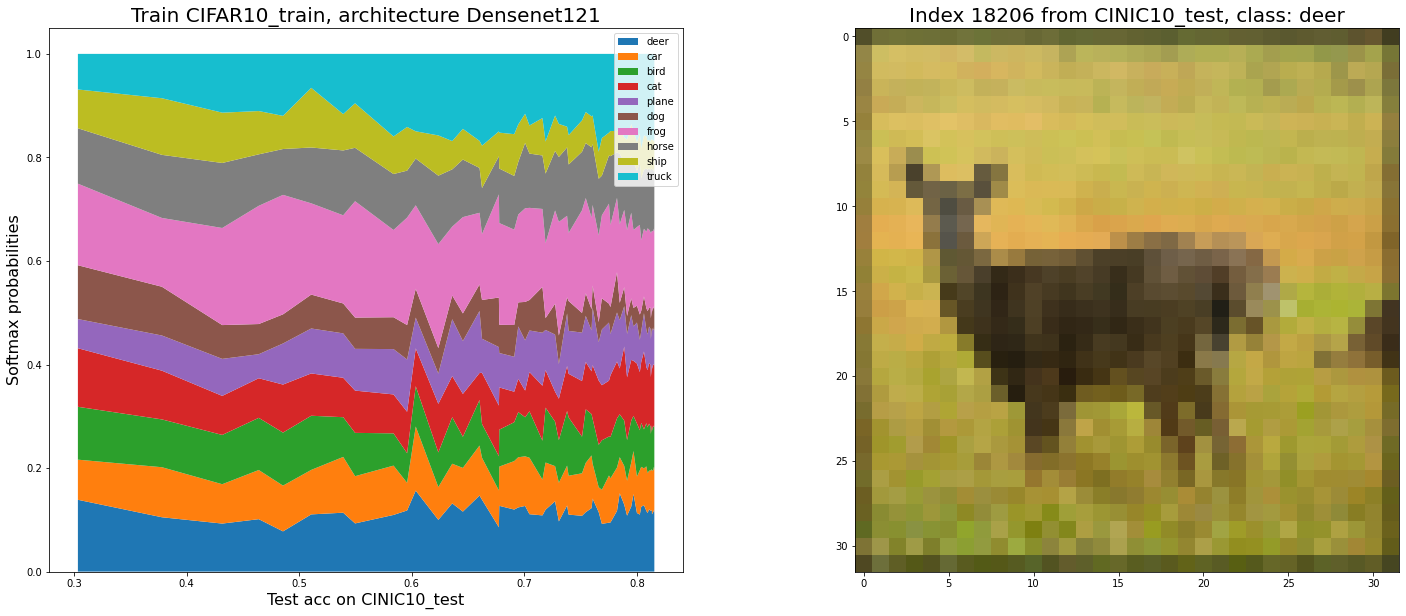

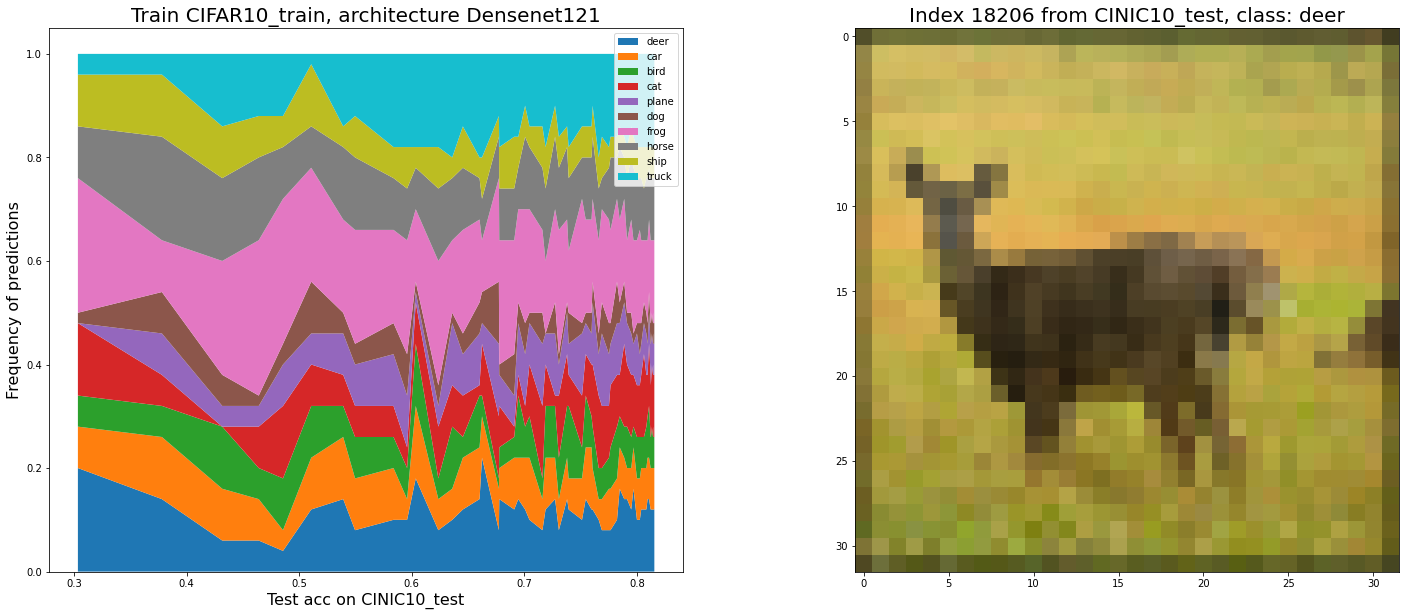

index 58592
probs
freqs


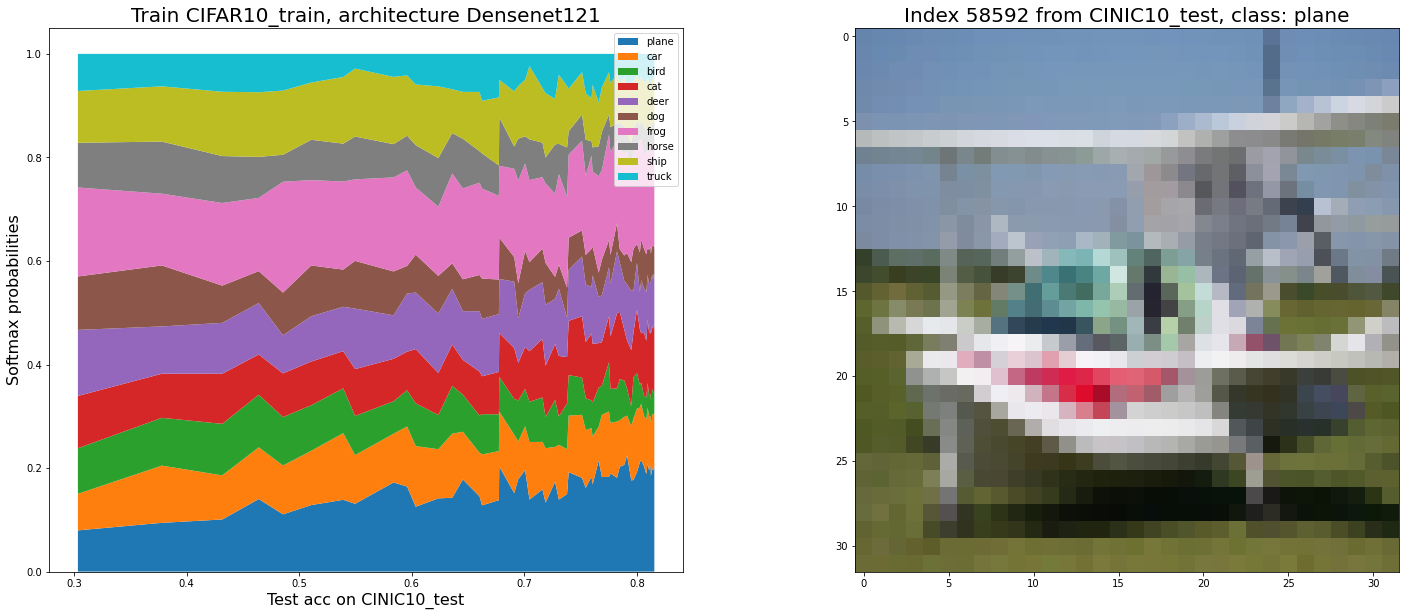

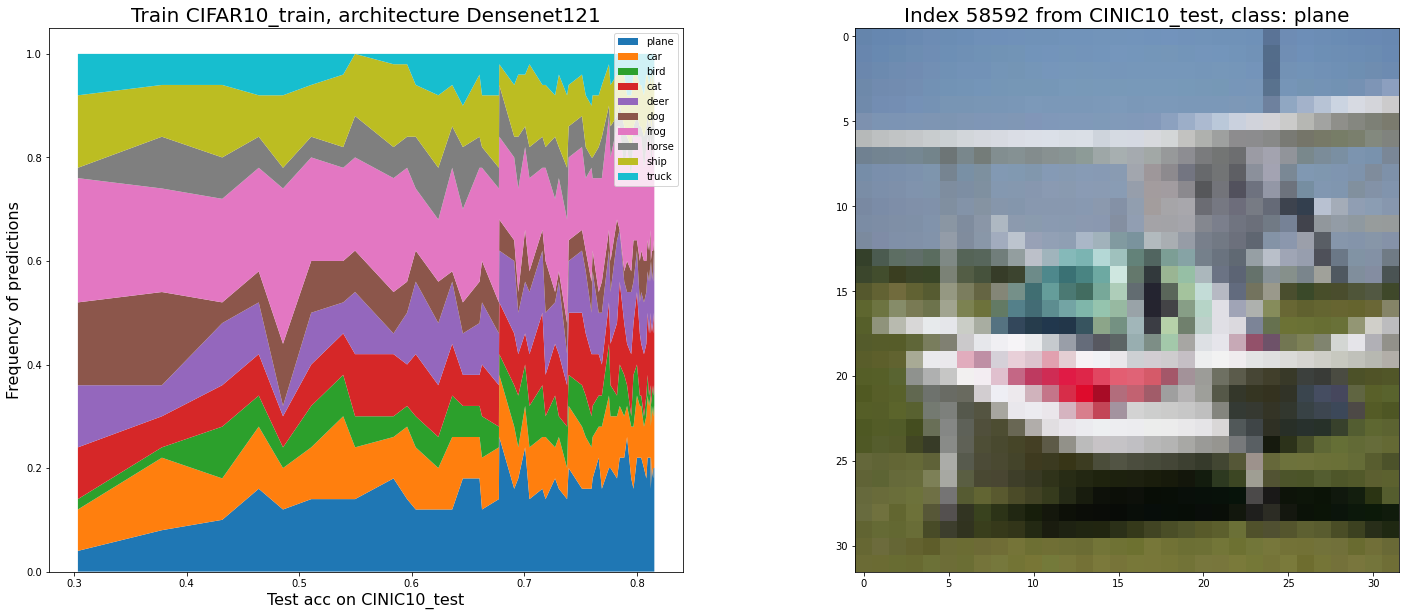

index 40670
probs
freqs


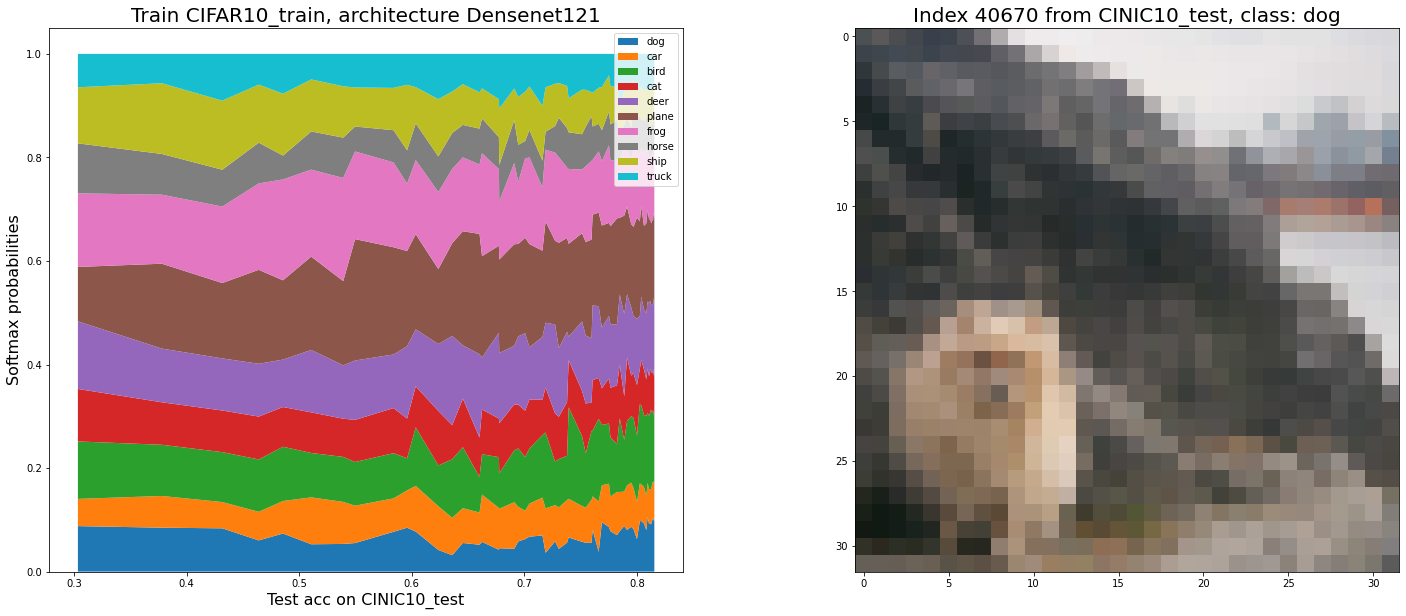

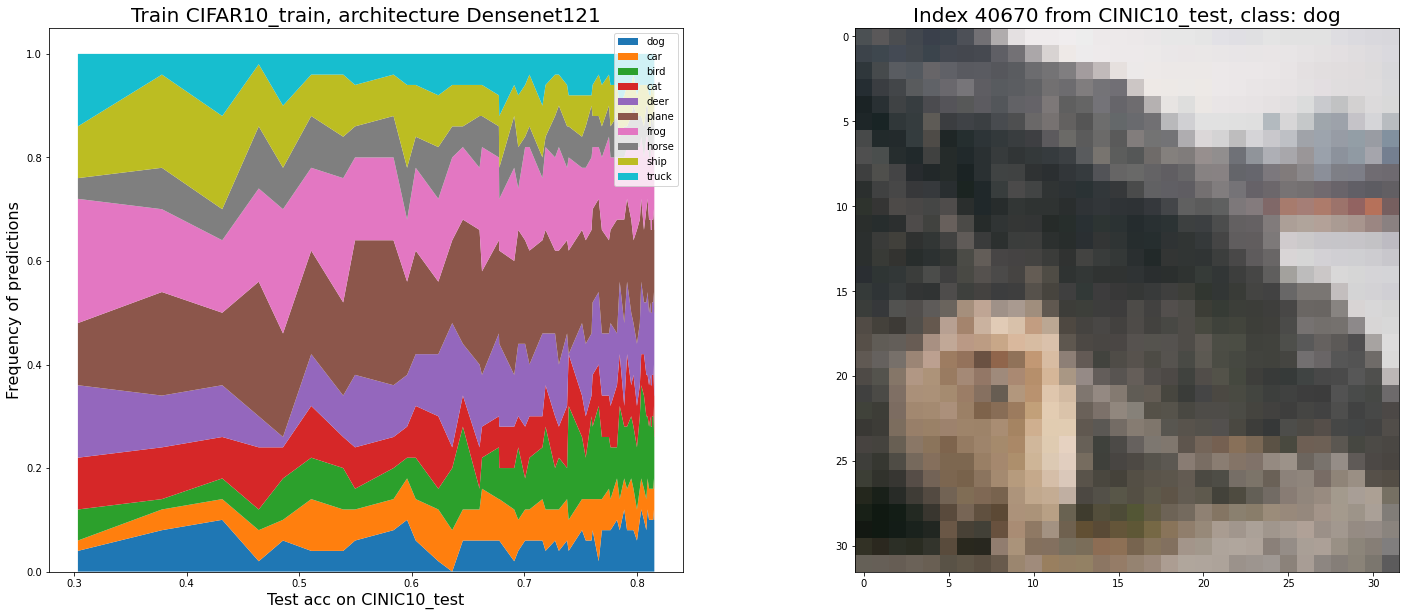

index 71144
probs
freqs


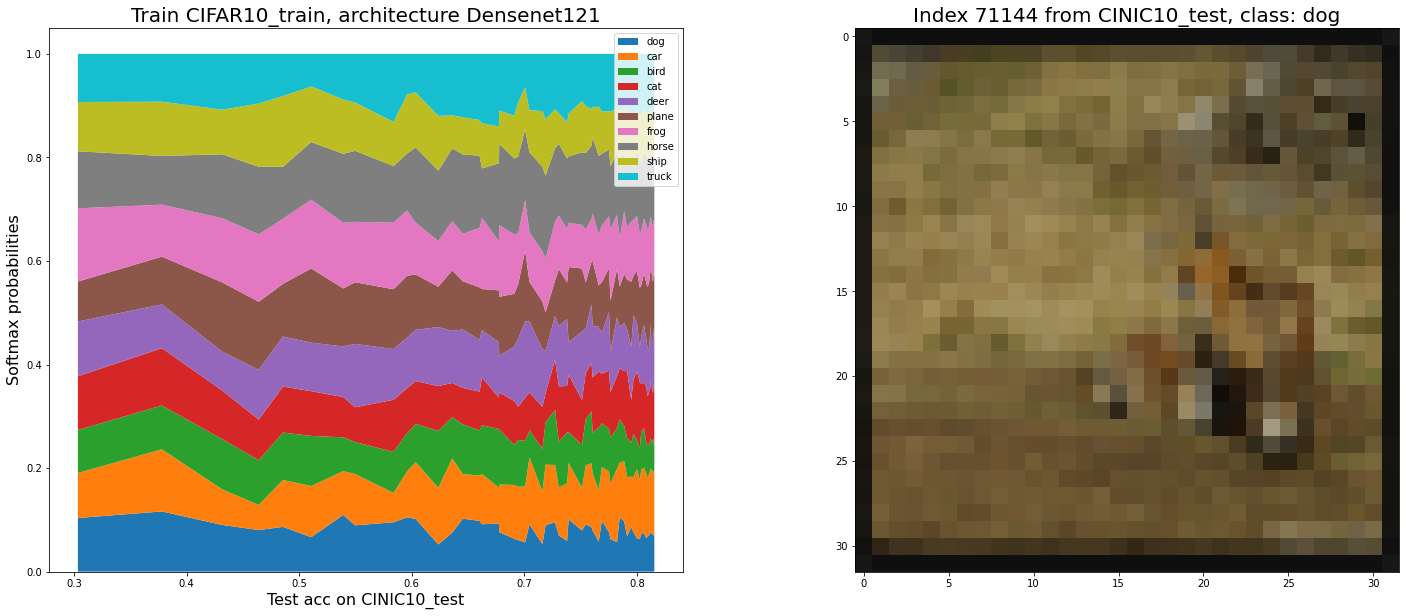

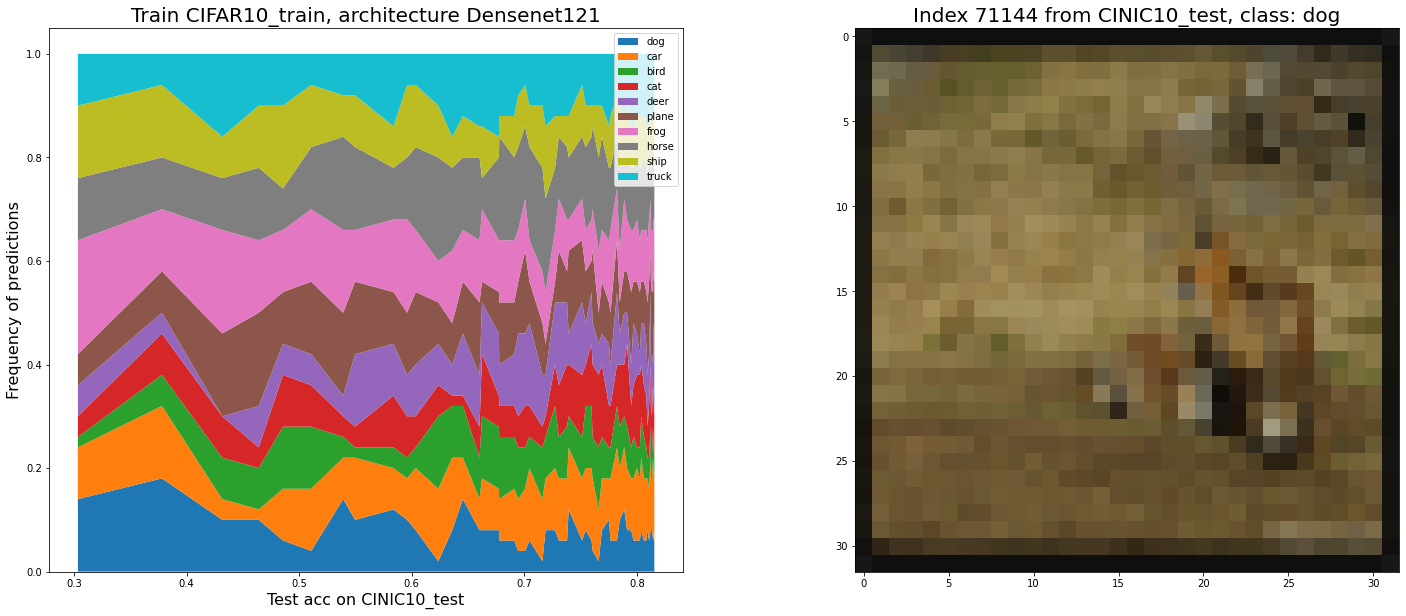

index 60123
probs
freqs


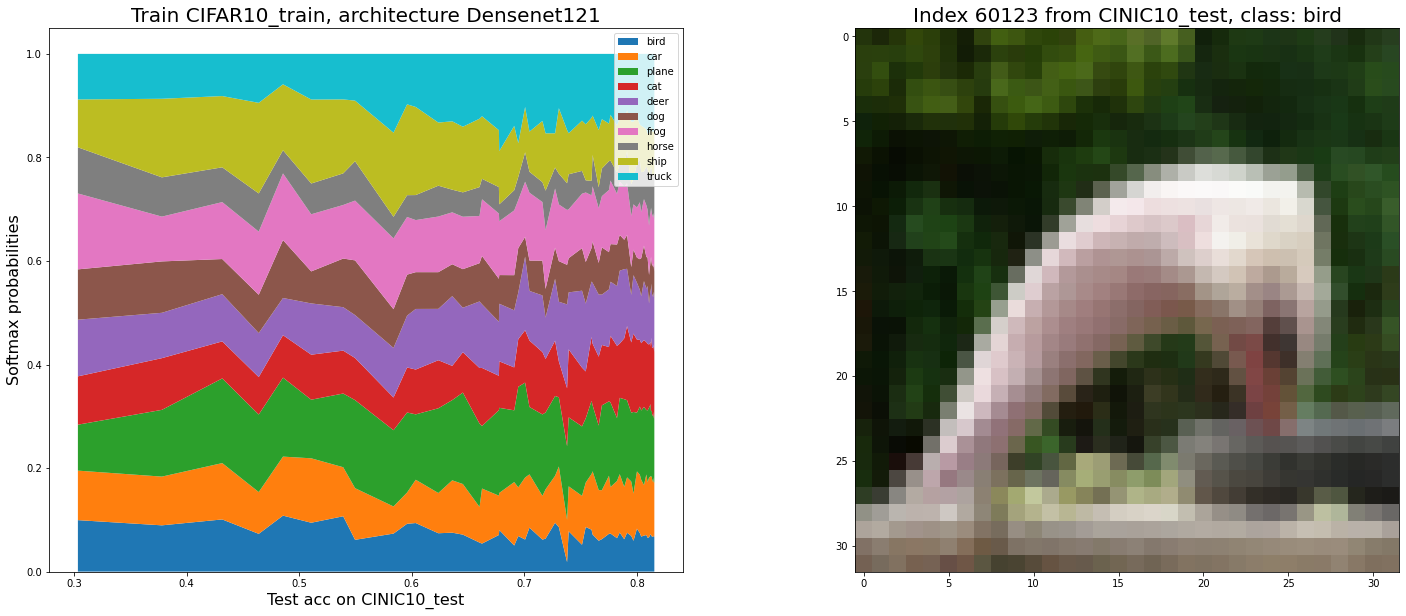

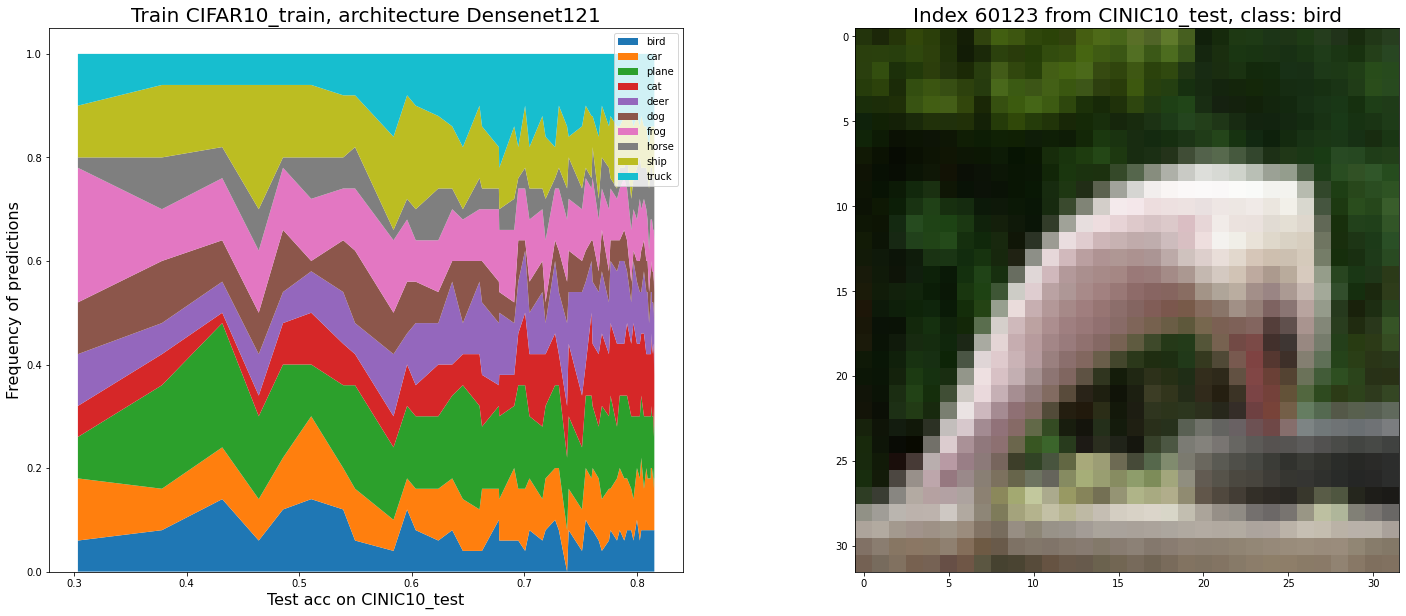

index 37670
probs
freqs


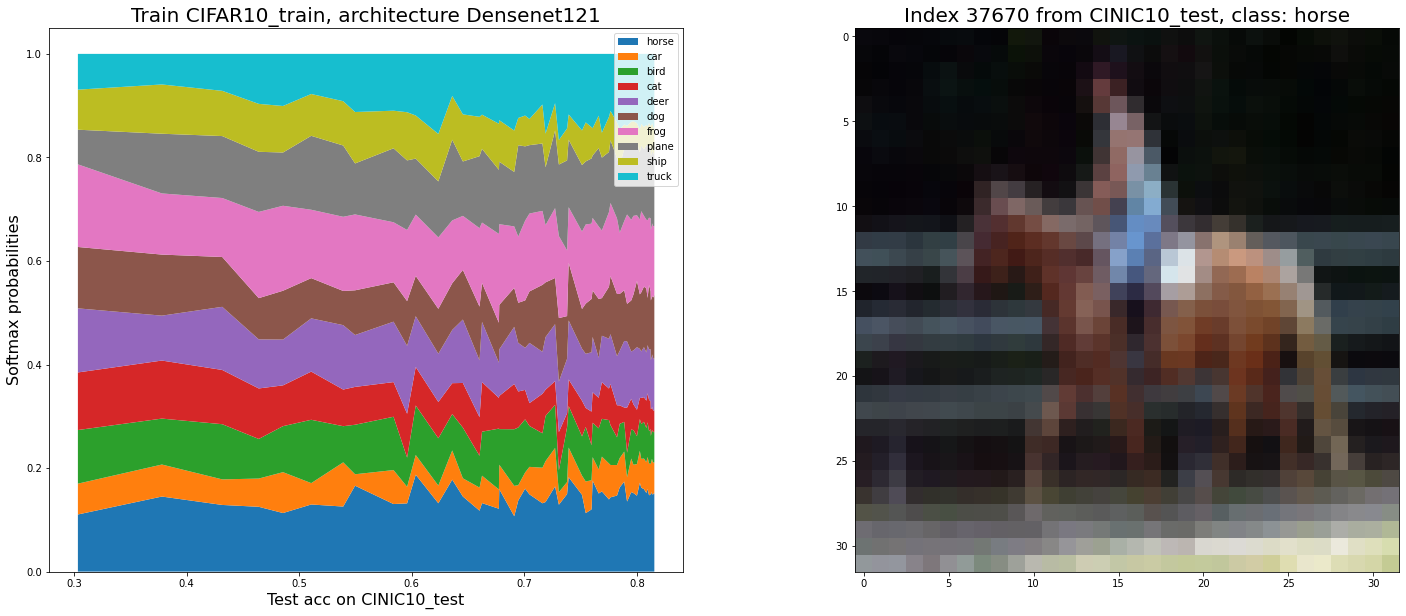

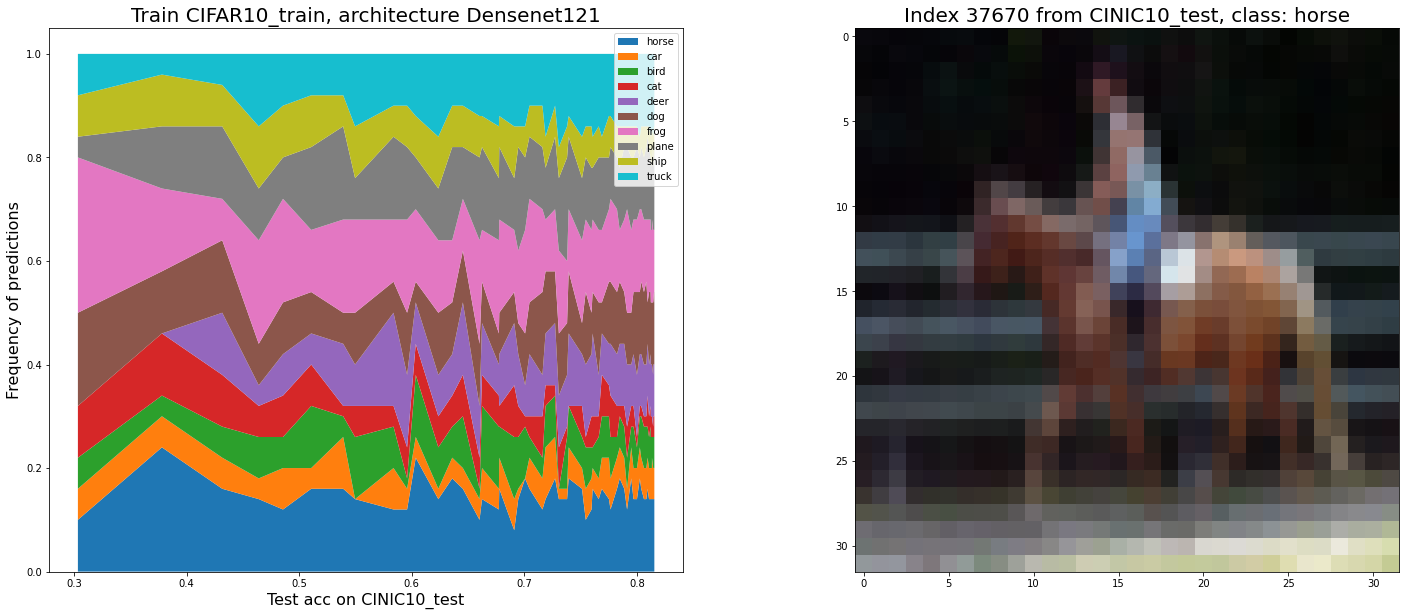

index 85285
probs
freqs


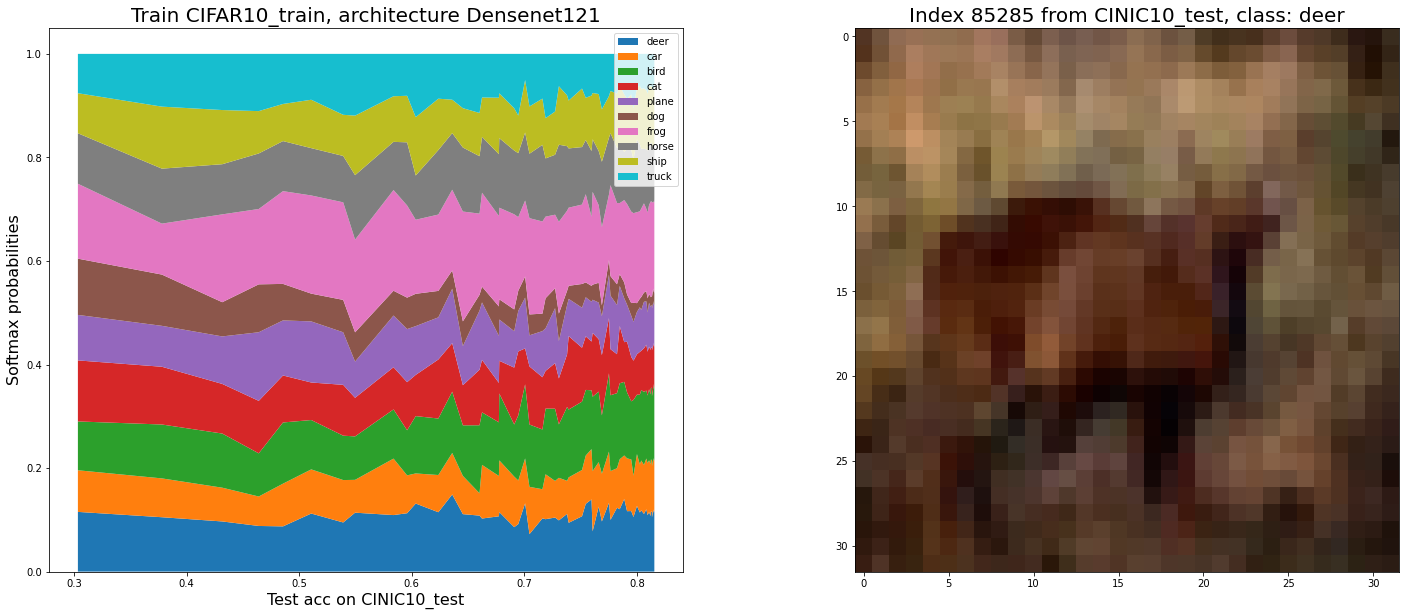

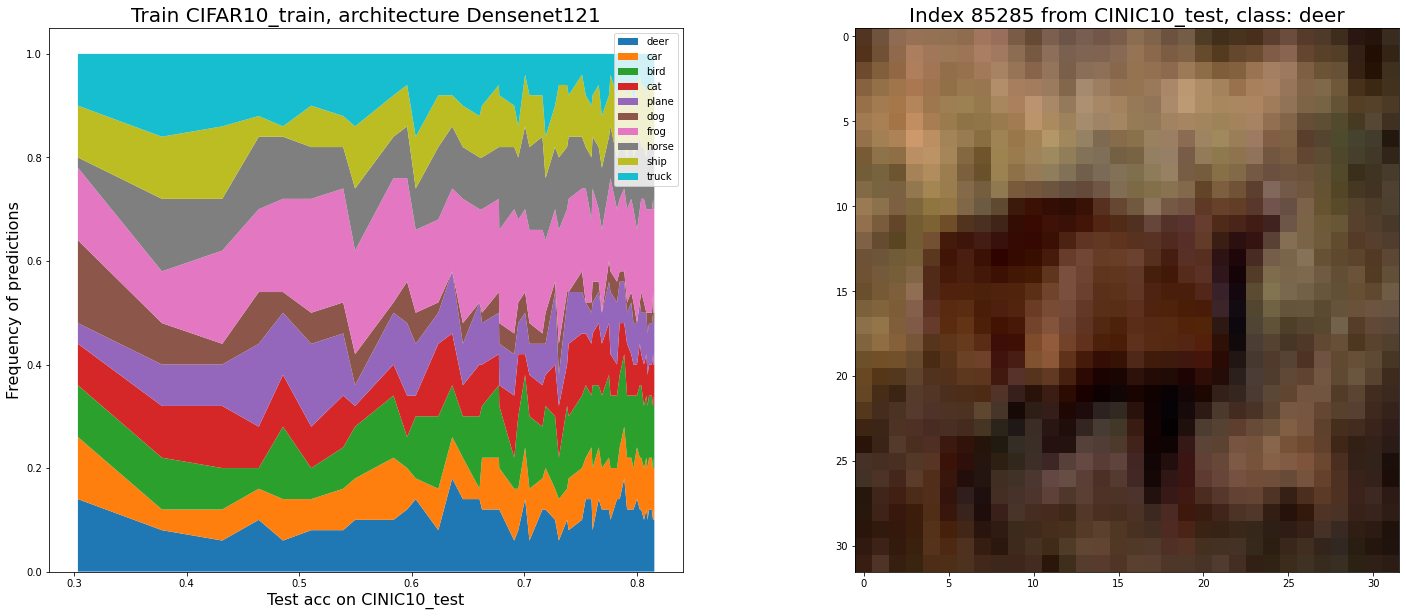

index 7716
probs
freqs


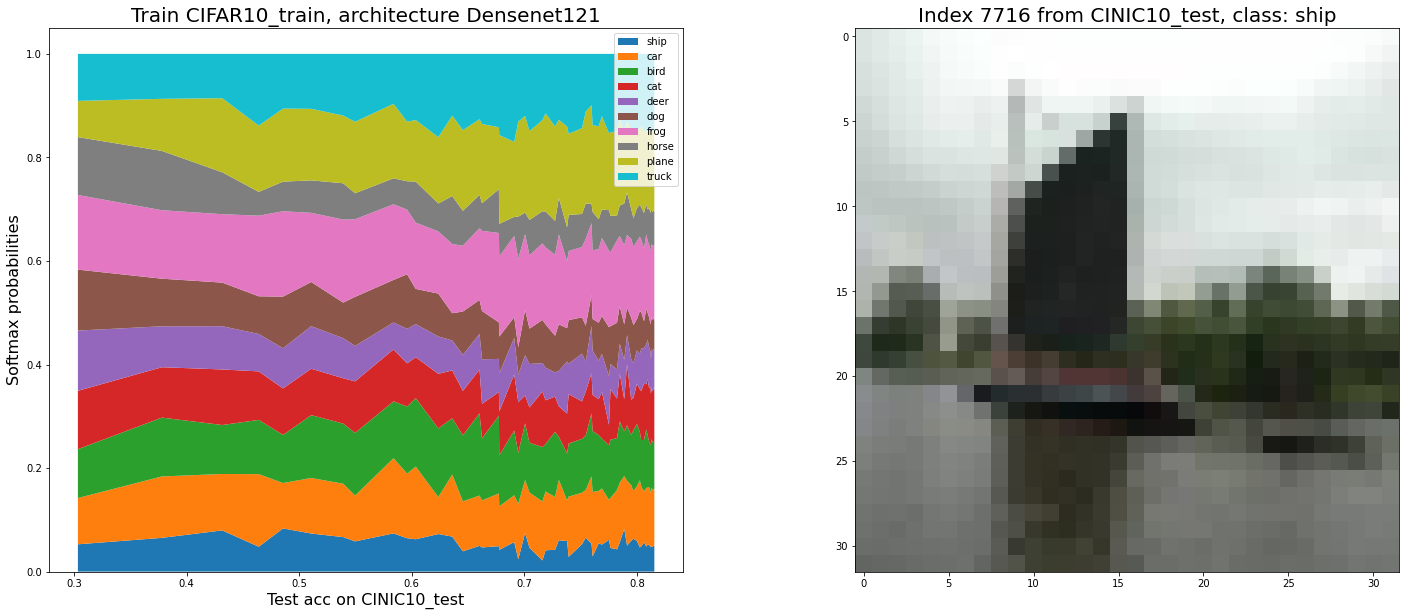

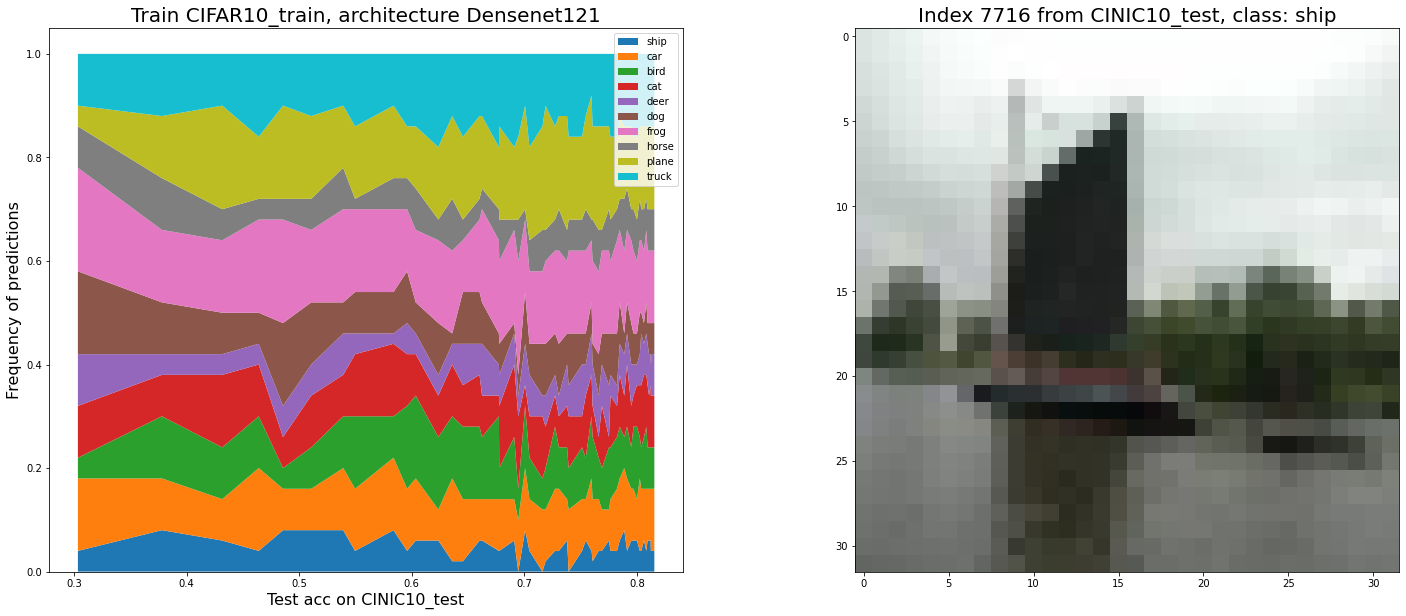

index 11083
probs
freqs


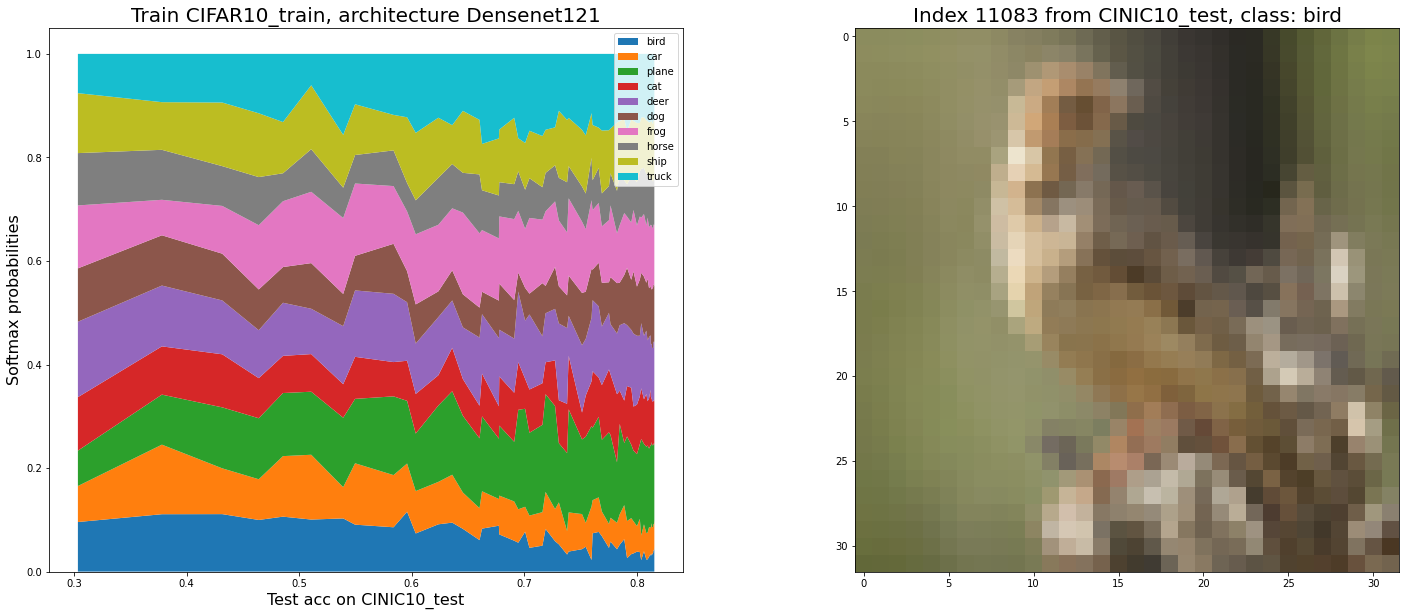

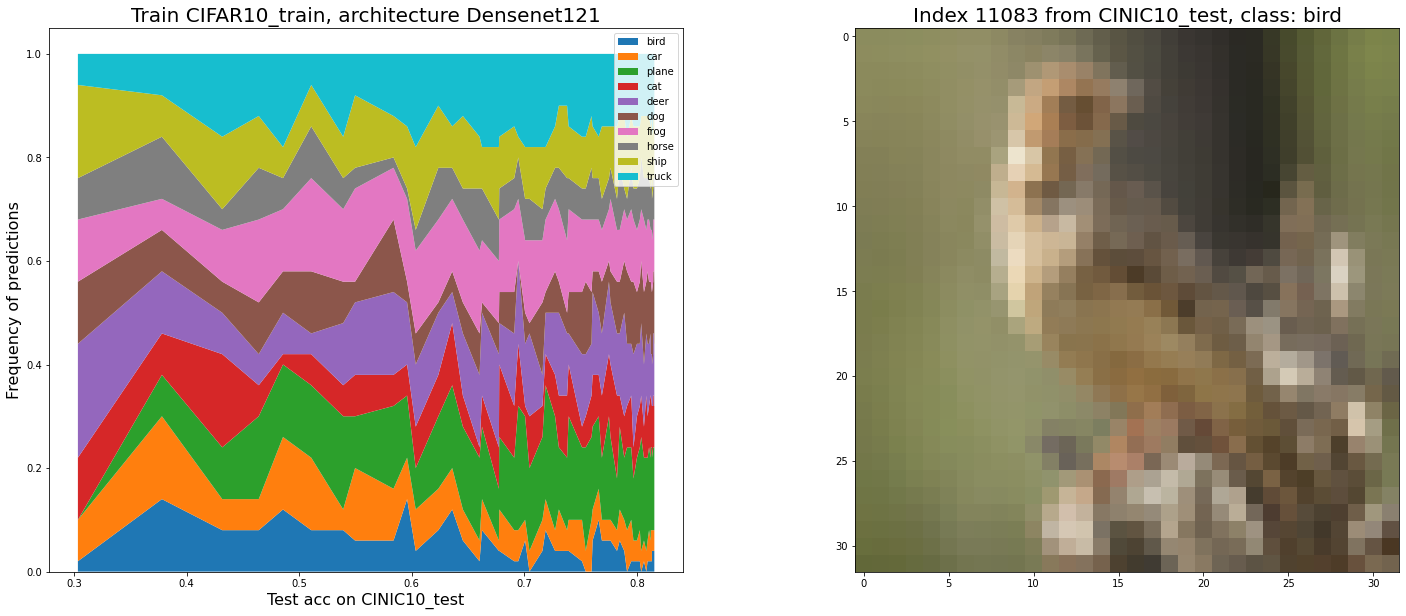

In [34]:
plot_group = "Densenet121"
dct = grouped[name][plot_group]
# plot_path = join(save_dir, name, plot_group, ind_type)

# stack plots (needs data with stored logits)
for idx in indexes:
    print("index %d" % idx)
    img, label = dataset.__getitem__(idx)
    img = np.array(img)

    # probs
    print("probs")
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
    y = dct["probs"][idx]
    y[[0, label]] = y[[label, 0]]
    labels = classes.copy()
    labels[0], labels[label] = labels[label], labels[0]
    ax1.stackplot(dct["x"], y, labels=labels)
    ax1.set_xlabel("Test acc on %s" % name, fontsize=16)
    ax1.set_ylabel("Softmax probabilities", fontsize=16)
    ax1.set_title(
        "Train %s, architecture %s" % (train_set, plot_group),
        fontsize=20,
    )

    ax1.legend(loc="best")
    ax2.imshow(img, interpolation="nearest")
    ax2.set_title("Index %d from %s, class: %s" % (idx, name, classes[label]), fontsize=20)

#     if not os.path.isdir(plot_path):
#         os.mkdir(plot_path)
#     if not os.path.isdir(join(plot_path, "probs")):
#         os.mkdir(join(plot_path, "probs"))
#     plt.savefig(join(plot_path, "probs", "plot_probs_" + str(idx) + ".png"))
#     plt.show()

    # freqs
    print("freqs")
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
    y = dct["freqs"][idx]
    y[[0, label]] = y[[label, 0]]
    labels = classes.copy()
    labels[0], labels[label] = labels[label], labels[0]
    ax1.stackplot(dct["x"], y, labels=labels)
    ax1.set_xlabel("Test acc on %s" % name, fontsize=16)
    ax1.set_ylabel("Frequency of predictions", fontsize=16)
    ax1.set_title(
        "Train %s, architecture %s" % (train_set, plot_group),
        fontsize=20,
    )

    ax1.legend(loc="best")
    img, label = dataset.__getitem__(idx)
    img = np.array(img)
    ax2.imshow(img, interpolation="nearest")
    ax2.set_title("Index %d from %s, class: %s" % (idx, name, classes[label]), fontsize=20)
#     if not os.path.isdir(plot_path):
#         os.mkdir(plot_path)
#     if not os.path.isdir(join(plot_path, "freqs")):
#         os.mkdir(join(plot_path, "freqs"))
#     plt.savefig(join(plot_path, "freqs", "plot_freqs_" + str(idx) + ".png"))
    plt.show()